In [1]:
##import custom modules from the parent directory

import ivisetup as ivi
import subgroupcorr as sgc
import indicorr as ic
import overallcorr as oc
import linearregression as lr
import machinelearning as ml
import dtree as dt

##import standard modules
import pandas as pd
import scipy.stats as stats
import os
import numpy as np

## define path to ivi results file 'Results_1_2_3_collated_KR.csv'

path_to_initial_dataset = "C:/Users/KatherineRidley/Mint Diagnostics Ltd/Mint Drive - Documents/Data/Saliva_Blood_Comparison_Studies_KR/IVIRMA/Spreadsheets/Results_1_2_3_collated_KR.csv"

## define path to output directory
## this is where output folders will be created and the output files saved

path_to_output_directory = "C:/Users/KatherineRidley/Mint Diagnostics Ltd/Mint Drive - Documents/Data/Saliva_Blood_Comparison_Studies_KR/IVIRMA/"


In [2]:

## call and run ivisetup module to create, clean and handle ivi dataframe
print('starting data cleaning with ivisetup module...')
dh = ivi.data_handling(path_to_initial_dataset)
decoded = dh.barcodesplit()
print('barcode split')
groupafeatures = dh.groupafeatures(decoded)
print('group a features extracted')
handled_ivi = dh.scaletopg(groupafeatures)

dc = ivi.data_cleaning(handled_ivi)
data=handled_ivi

samples = [(data['Sample'].str.contains('F')), (data['Sample'].str.contains('C'))]
types = list(data['Type'].unique())

for s in samples:
    for t in types:
        data=data.loc[s & (data['Type']==t)]
        if len(data)>0:

            outliers_removed = dc.outliers_3std()
            #outliers_removed = init_data.remove_outliers_between_1_99_quantile_method()
            quartilesplit = dc.quartiles(outliers_removed)

print('outliers removed')

#normalised = dc.normalise(quartilesplit)
#print('normalised variables added')
numericised = dc.numericfeatures(quartilesplit)
stringadjusted = dc.adjust_strings(numericised)


raw_dataframe_for_plotting= dc.binarizetime(stringadjusted)
print('raw dataframe for plotting created')

transposed_dataframe_for_correlation_and_regression = dc.transpose(raw_dataframe_for_plotting)


transposed_dataframe_with_predicted_change, relative_change_quantify = dc.predict_change(transposed_dataframe_for_correlation_and_regression)
print('transposed dataframe with predicted change variable created for correlation and regression')

##create dataframe with linreg y prediction features for machine learning
experiment = 'linear_regression'
os.makedirs(path_to_output_directory+experiment, exist_ok=True)
export_path = path_to_output_directory + experiment + '/'

dataframe_w_linear_reg_features, accuracy = lr.predict_y(transposed_dataframe_with_predicted_change, export_path)
print('linear regression features added to dataframe for machine learning analysis')

dataframe_w_linear_reg_features.to_csv(export_path+'dataframe_w_linear_reg_features.csv')

starting data cleaning with ivisetup module...
barcode split
group a features extracted
outliers removed
raw dataframe for plotting created
transposed dataframe with predicted change variable created for correlation and regression
linear regression features added to dataframe for machine learning analysis


invalid value encountered in true_divide
invalid value encountered in true_divide


correlation statistic of interest is:  spearmanr
implementing overall correlation analysis with overallcorr module...


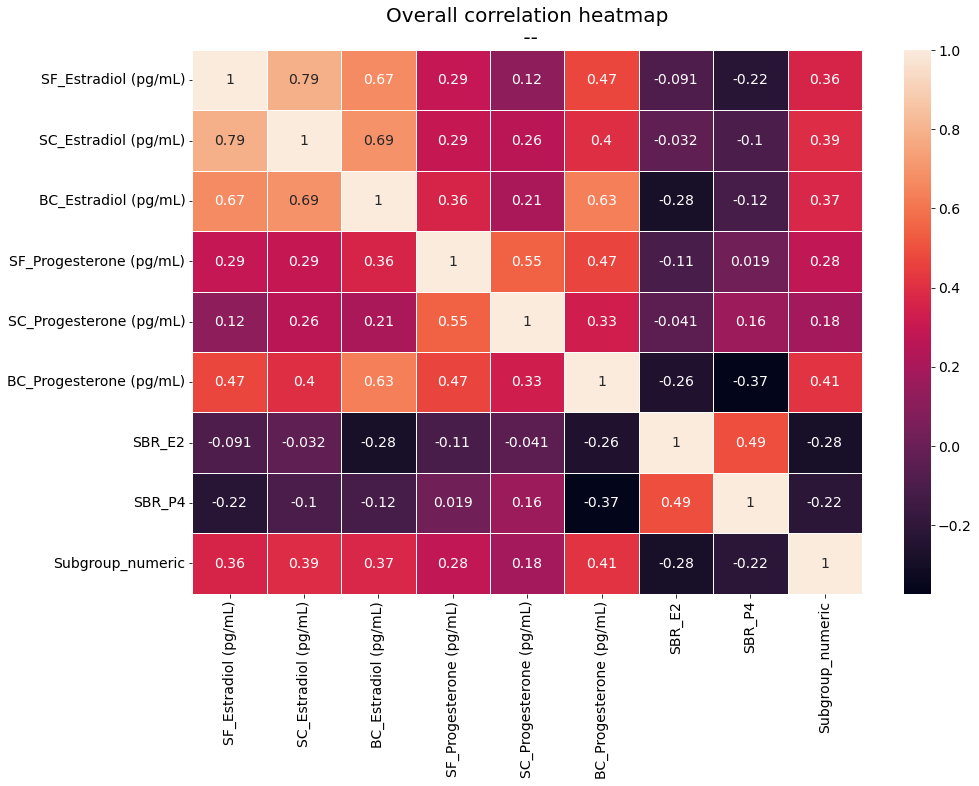

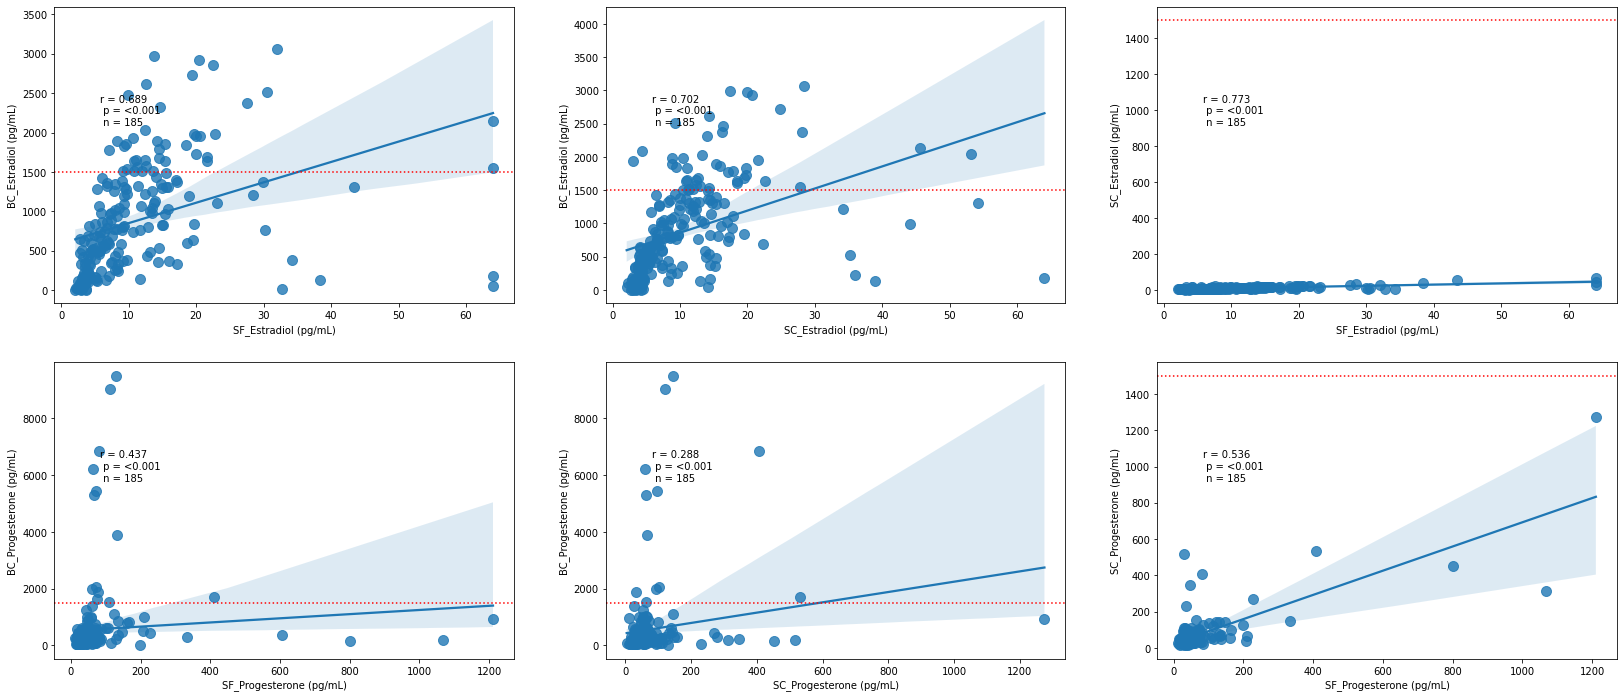

overall correlation heatmap created and saved to overall_corr folder


In [4]:
## Running overall correlation statistics with figures as output
# create folder for overall_corr figures
experiment = 'overall_corr'
os.makedirs(path_to_output_directory +experiment, exist_ok=True)

export_path = path_to_output_directory + experiment + '/'

## specify your correlation statistic of interest i.e. stats.spearmanr, stats.pearsonr
corr = stats.spearmanr

#print(corr.__name__)

#------------------------------------------------------------
print('correlation statistic of interest is: ', corr.__name__)
print('implementing overall correlation analysis with overallcorr module...')
allcorr =oc.every_corr(transposed_dataframe_with_predicted_change, export_path, corr)

allcorr.heatmap()

allcorr.plots()
print('overall correlation heatmap created and saved to overall_corr folder')

<Figure size 432x288 with 0 Axes>

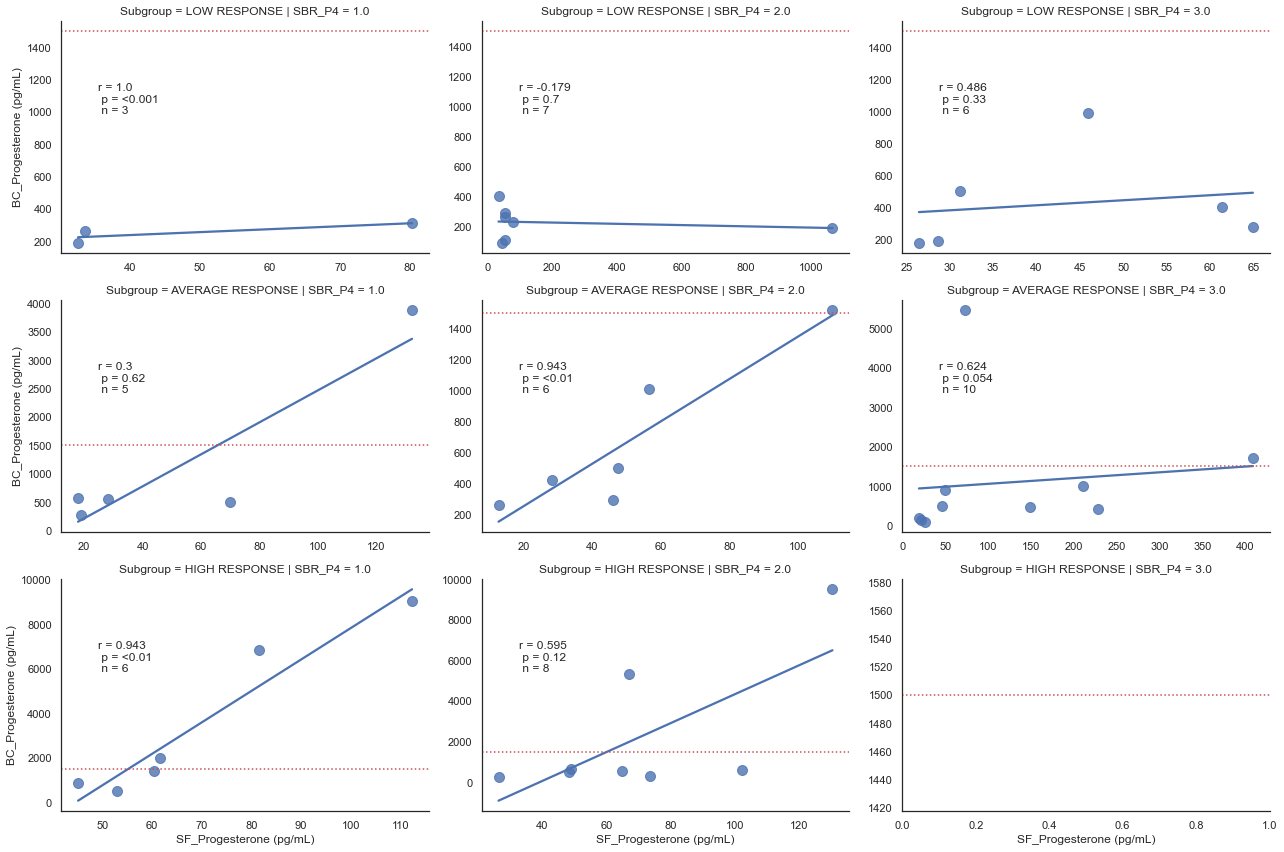

<Figure size 432x288 with 0 Axes>

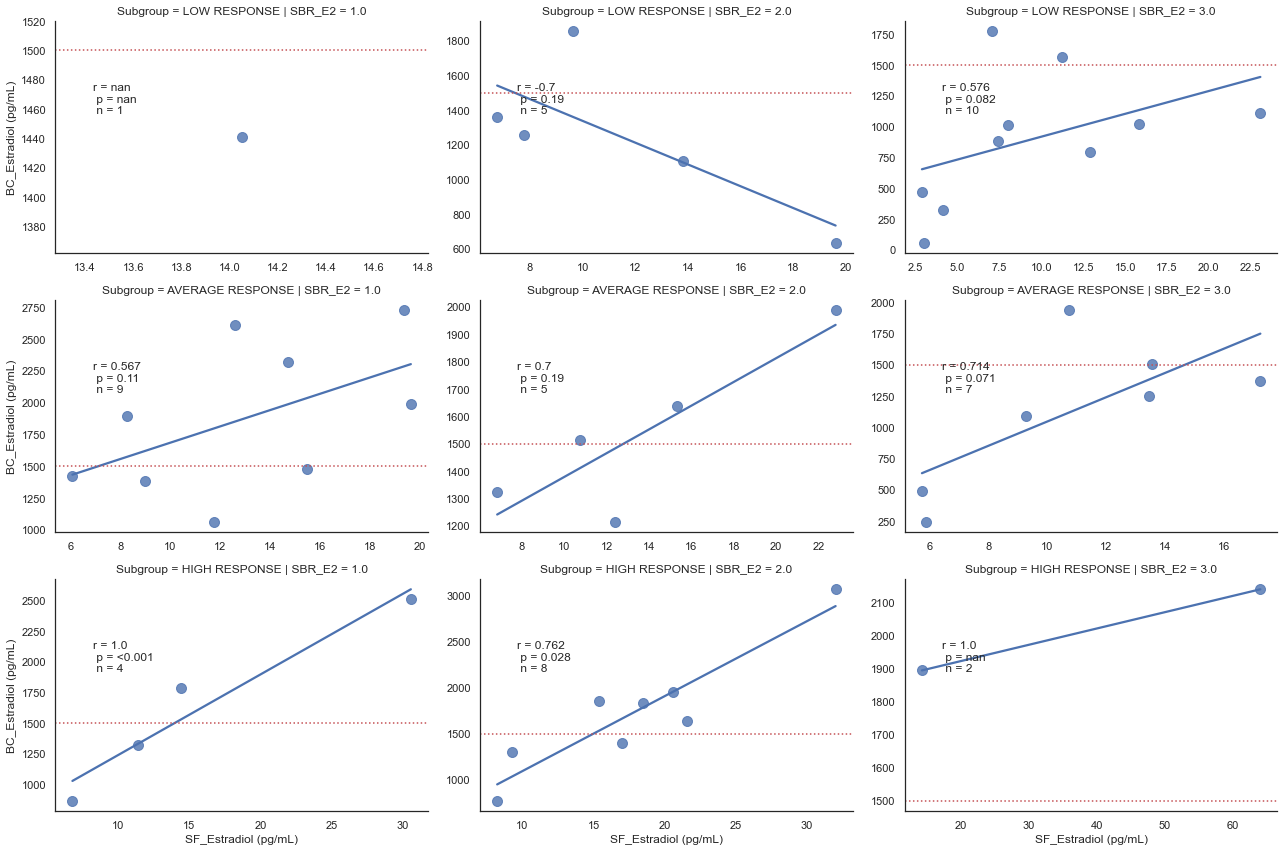

<Figure size 432x288 with 0 Axes>

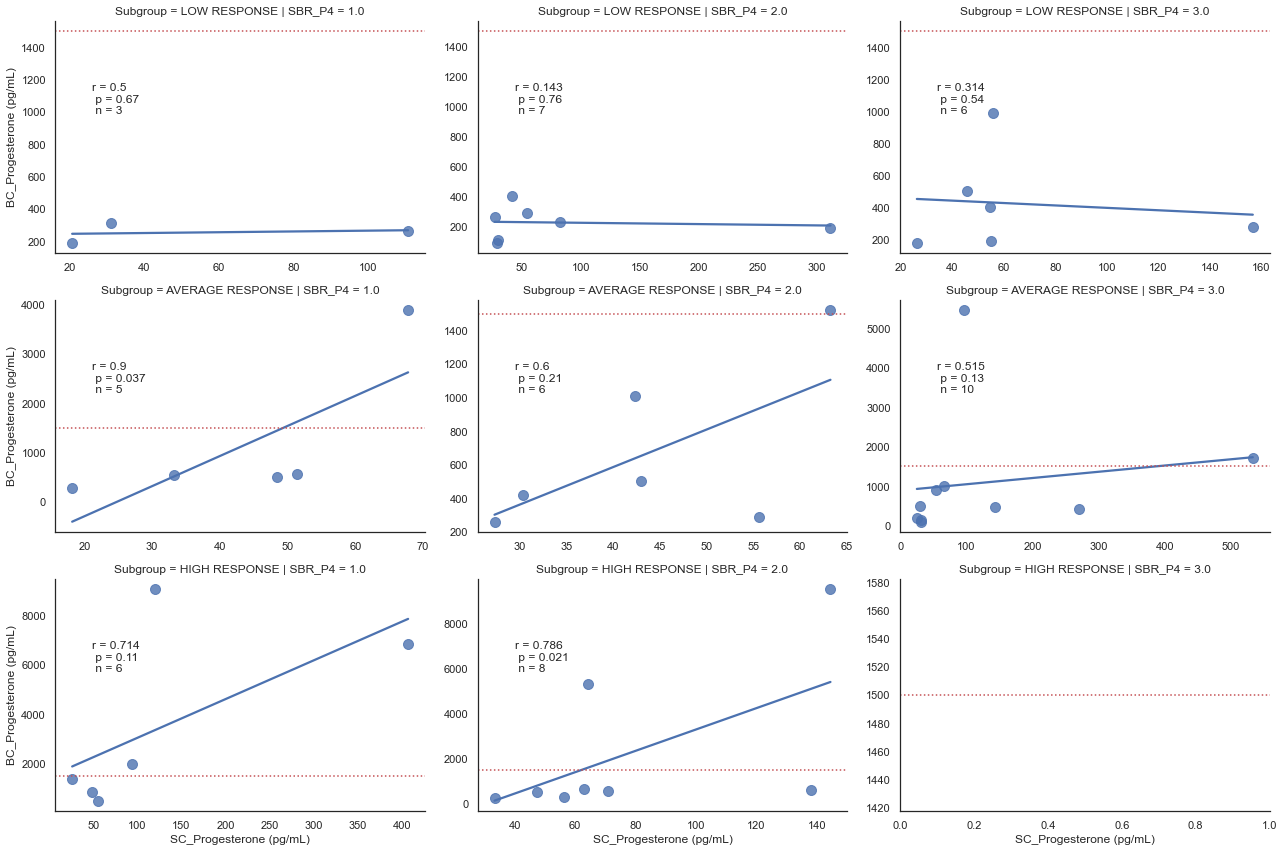

<Figure size 432x288 with 0 Axes>

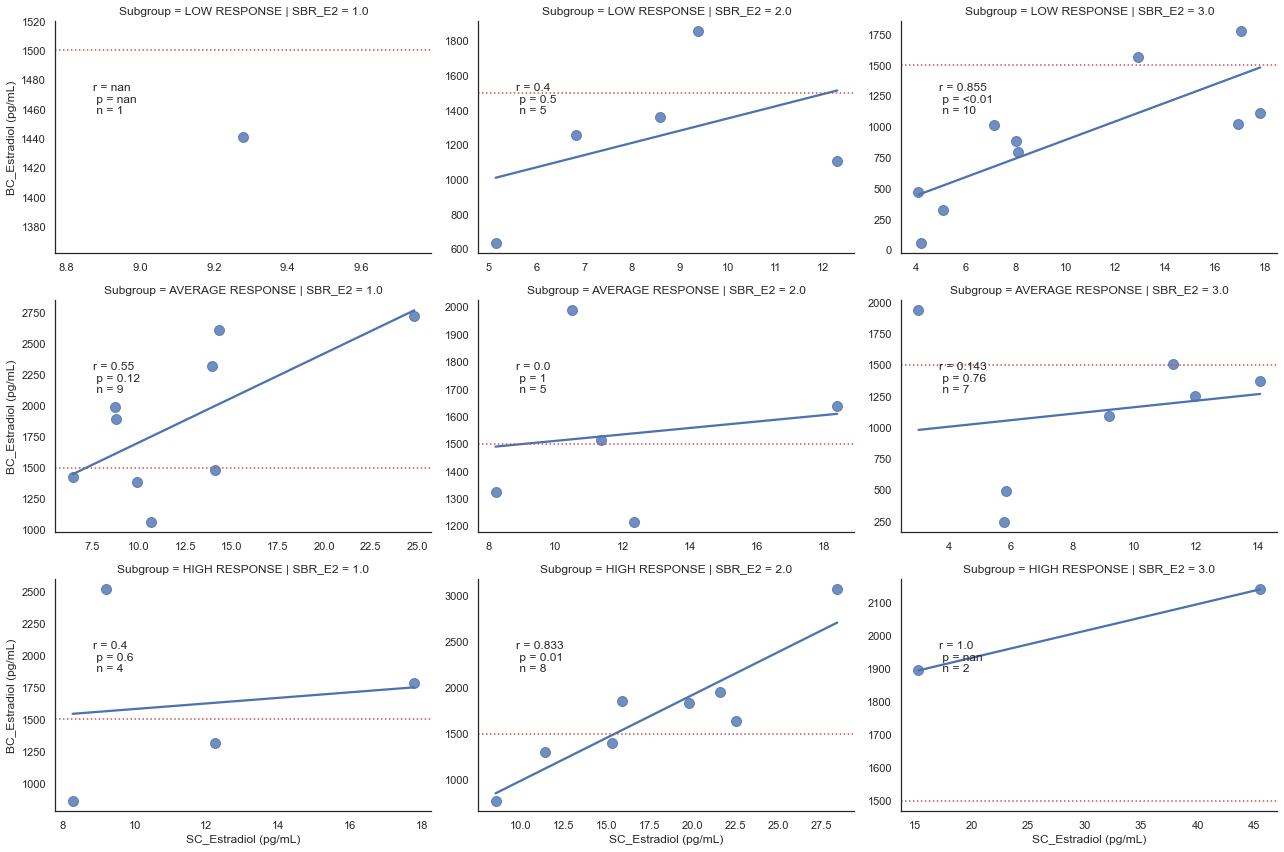

In [8]:
## Running subgroup correlation statistics with figures as output
# create folder for subgroup_corr figures
experiment = 'subgroup_corr'
os.makedirs(path_to_output_directory +experiment, exist_ok=True)

export_path = path_to_output_directory + experiment + '/'

#print(transposed_dataframe_with_predicted_change)


data=transposed_dataframe_with_predicted_change.loc[transposed_dataframe_with_predicted_change.Round==3].copy()
#sgc_norm_csv = sgc.norm_dist_corr(transposed_dataframe_with_predicted_change)
sgcplots = sgc.plots(data, export_path, stats.spearmanr)
#sgcheatmap = sgc.heatmap(transposed_dataframe_with_predicted_change, export_path, 'spearman')
#sgc_norm_csv.to_csv(path_to_output_directory +'sgc_norm_csv.csv')

In [10]:
sgc_norm_csv.to_csv(path_to_output_directory +'sgc_norm_csv.csv')

NameError: name 'sgc_norm_csv' is not defined

In [ ]:
print(len(transposed_dataframe_for_correlation_and_regression.loc[transposed_dataframe_for_correlation_and_regression['BC_Progesterone (pg/mL)'].isnull()]))
print(len(dataframe_w_linear_reg_features.loc[dataframe_w_linear_reg_features['BC_Progesterone (pg/mL)'].isnull()]))
print(len(dataframe_w_linear_reg_features.loc[dataframe_w_linear_reg_features['BC_Progesterone (pg/mL)'].isnull()]))

#print(transposed_dataframe_for_correlation_and_regression.head(50))
#print(len(dataframe_w_linear_reg_features.loc[dataframe_w_linear_reg_features['BC_Progesterone (pg/mL)']>1500]))


In [ ]:
## Running linear regression algorithms
# create folder for linear_regression figures
experiment = 'linear_regression'
os.makedirs(path_to_output_directory +experiment, exist_ok=True)

export_path = path_to_output_directory + experiment + '/'

lr.OLS(transposed_dataframe_with_predicted_change, export_path)

dataframe_w_linear_reg_features, accuracy_linreg_dataframe = lr.predict_y(transposed_dataframe_with_predicted_change, export_path)

In [3]:

## Running machine learning analysis with STATS AS OUTPUT

## Filling na saliva values with predicted change calculations per subgroup

data = pd.read_csv(path_to_output_directory + 'linear_regression/' + 'dataframe_w_linear_reg_features.csv')

#print(data)

experiment = 'machine_learning'

os.makedirs(path_to_output_directory+experiment, exist_ok=True)

export_path = path_to_output_directory + experiment + '/'

#clf = ml.classifier(data, raw_dataframe_for_plotting, export_path)

#dataframe_ml_features = clf.feature_transform()

#print(dataframe_ml_features.BC_E2_Decison_f)
#print('machine learning features engineered...')
#dt.simple_tree(dataframe_ml_features, export_path)
#clf.fit_rf_grid(dataframe_ml_features)
#print('random forest grid search complete...')
#clf.test_rf_model(dataframe_ml_features)
#print('random forest model tested, accuracy score and confusion matrix saved to Stats/machine_learning folder')



In [4]:
dataframe_ml_features = pd.read_csv(export_path+'machine_learning_dataframe.csv')

print(dataframe_ml_features['Saliva:Serum_S1_P4_Ratio_bucket'].value_counts())

print(dataframe_ml_features['Subgroup#'].value_counts())

clf = ml.classifier(data, raw_dataframe_for_plotting, export_path)

dt.simple_tree(dataframe_ml_features, export_path)
clf.fit_rf_grid(dataframe_ml_features)
print('random forest grid search complete...')
clf.test_rf_model(dataframe_ml_features)



2.0    26
1.0    25
3.0    25
Name: Saliva:Serum_S1_P4_Ratio_bucket, dtype: int64
2.0    30
3.0    27
1.0    26
Name: Subgroup#, dtype: int64
E2 SC


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').